In [8]:
import pandas as pd
import numpy as np
import xray

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as plt3d
from matplotlib.colors import LightSource
from matplotlib import cm

from matplotlib import rcParams

# Set font sizes
rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
#rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

#%matplotlib notebook


In [2]:
#kdvfile = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080609_dx100_dt04a0050_Lw040000_mode1_nuH00.nc'
# 20080609, 20071001, 20080303
#kdvfile = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080414_dx100_dt04a0075_Lw040000_mode1_nuH01.nc'
kdvfile = '../SCENARIOS/data_Apr_Nk75/IWaveRidge_ModeAmp.nc'
scenario = 'Apr_Mode2'

#kdvfile = '../SCENARIOS/data_Mar_Nk75/IWaveRidge_ModeAmp.nc'
#scenario = 'Mar_Mode1'

ds = xray.open_dataset(kdvfile)
ds
amp = ds.amp_b_re
mode = 0
amp, ds
#mykdv = from_netcdf(kdvfile)
#ds


(<xarray.DataArray 'amp_b_re' (time: 241, Nc: 2800, Nmode: 5)>
 [3374000 values with dtype=float64]
 Coordinates:
     xv       (Nc) float64 ...
     yv       (Nc) float64 ...
     Nk       (Nc) int32 ...
   * time     (time) datetime64[ns] 2000-01-01T00:00:15 2000-01-01T00:30:00 ...
 Dimensions without coordinates: Nc, Nmode
 Attributes:
     long_name:  Buoyancy real amplitude
     units:      m s-2, <xarray.Dataset>
 Dimensions:   (Nc: 2800, Ne: 8401, Nk: 75, Nkw: 76, Nmode: 5, Np: 5602, numsides: 4, time: 241, two: 2)
 Coordinates:
     xv        (Nc) float64 ...
     yv        (Nc) float64 ...
     xe        (Ne) float64 ...
     ye        (Ne) float64 ...
     Nk        (Nc) int32 ...
   * time      (time) datetime64[ns] 2000-01-01T00:00:15 2000-01-01T00:30:00 ...
 Dimensions without coordinates: Nc, Ne, Nkw, Nmode, Np, numsides, two
 Data variables:
     xp        (Np) float64 ...
     yp        (Np) float64 ...
     lonv      (Nc) float64 ...
     latv      (Nc) float64 ...
   

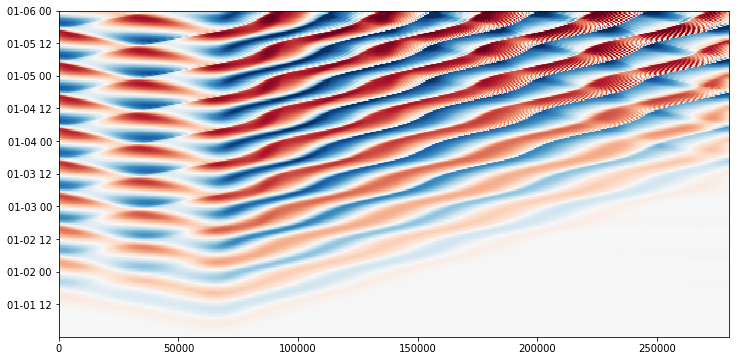

In [3]:
plt.figure( figsize=(12,6))
plt.pcolormesh(amp.xv.values, amp.time.values,amp.values[:,:,mode],vmin=-30,vmax=30, cmap='RdBu')
#plt.xlim(0,15e4)

In [4]:

def get_mode_amp(ds, mode, tslice=slice(None), xslice=slice(None)):
    t = ds.time.values[tslice].astype(np.float)*1e-9
    t-=t[0]
    t/=(12.42*3600.)
    nt = t.shape[0]
    dt = t[1]-t[0]

    x = ds.xv.values[xslice]
    nx = x.shape[0]

    ones = np.ones((nt,nx))
    # Create a 2D time and X array
    T = t[:,np.newaxis] * ones
    X = x[np.newaxis,:] * ones
    #c1=ds.cn.values[mode,-1] *12.42*3600.
    #print(c1)
    #S = np.cumsum(ones*dx/c1,axis=1) - T
    #S = X/c1


    B = amp.values[tslice,xslice,mode]
    
    return X,T,B

    #plt.xlim(8e4,14e4)

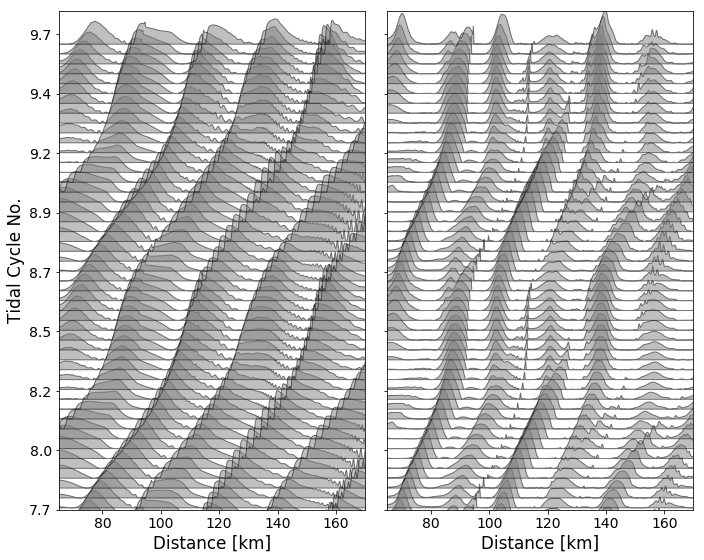

In [9]:
# Create a 2D plot
from matplotlib import ticker




def waterfall(X, Y, Z, fac=0.25,ax=None, **kwargs):
    # Compute the zscale and offset for each time point
    ny,nx = X.shape
    zscale = np.abs(Z).max()*ny*fac
    zoffset = 1./ny
    
    if ax is None:
        ax=plt.gca()
    
    
    def my_formatter_fun(x, p):
        return "%.1f" % (Y[min(int(x*ny),ny-1),0])
    
    # Reformat the time axis
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(my_formatter_fun))
        
    for tt in range(ny):
        ax.fill_between(X[tt,:], Z[tt,:]/zscale+tt*zoffset,y2=tt*zoffset, \
                **kwargs)

X,Y,Z = get_mode_amp(ds, 0)
X2,Y2,Z2 = get_mode_amp(ds, 1)

plt.figure(figsize=(10,8))

ax = plt.subplot(121, facecolor='w')
waterfall(X*1e-3,Y,Z**2., ax=ax, fac=0.25,\
    facecolor='0.5', alpha=0.5, edgecolor='k', rasterized=True)
#ax.set_xlim(0.65e2,1.5e2)
ax.set_xlim(0.65e2,1.7e2)

ax.set_ylim(0.80,1.01)
ax.set_ylabel('Tidal Cycle No.')
ax.set_xlabel('Distance [km]')

ax2 = plt.subplot(122, facecolor='w')
waterfall(X2*1e-3, Y2, Z2**2, ax=ax2, fac=0.25,\
    facecolor='0.5', alpha=0.5, edgecolor='k', rasterized=True)
#ax2.set_xlim(0.65e2,1.5e2)
ax2.set_xlim(0.65e2,1.7e2)

ax2.set_ylim(0.80,1.01)
ax2.set_yticklabels([])
ax2.set_xlabel('Distance [km]')

#ax3 = plt.subplot(423, facecolor='w')
#waterfall(X*1e-3,Y,Z**2., ax=ax3, fac=0.25, facecolor='0.5', alpha=0.5, edgecolor='k')
#ax3.set_xlim(1e2,1.2e2)
#ax3.set_ylim(0.8,1.01)
#ax3.set_xlabel('Distance [km]')
#ax3.set_ylabel('Tidal Cycle No.')

#ax4= plt.subplot(424, facecolor='w')
#waterfall(X2*1e-3, Y2, Z2**2, ax=ax4, fac=0.25, facecolor='0.5', alpha=0.5, edgecolor='k')
#ax4.set_xlim(1e2,1.2e2)
#ax4.set_ylim(0.8,1.01)
#ax4.set_yticklabels([])
#ax4.set_xlabel('Distance [km]')

plt.tight_layout()

plt.savefig('../FIGURES/wave_xt_%s.pdf'%scenario, dpi=150)


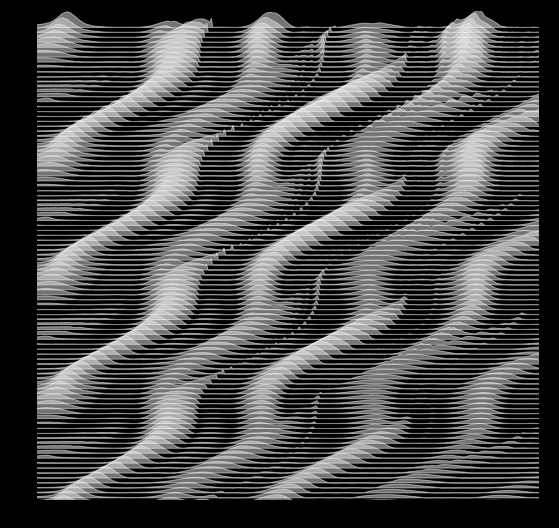

In [15]:
plt.figure(figsize=(9,9),facecolor='k')
ax2=plt.subplot(111)
ax2.set_facecolor('0.0')
waterfall(X2*1e-3, Y2, Z2**2, ax=ax2, fac=0.25, facecolor='0.9', alpha=0.5, edgecolor='w')
ax2.set_xlim(0.65e2,1.5e2)
ax2.set_ylim(0.6,1.01)
plt.axis('off')
plt.savefig('../FIGURES/OD-logo.pdf',facecolor='k',bbox_inches='tight', pad_inches=0)

In [16]:
plt.savefig?